# Imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [13]:
! wget https://raw.githubusercontent.com/DriveMyScream/Datasets/main/ETHUSD.csv
! wget https://raw.githubusercontent.com/DriveMyScream/Datasets/main/Ethereum%20Historical%20Data.csv

--2023-05-09 18:17:36--  https://raw.githubusercontent.com/DriveMyScream/Datasets/main/ETHUSD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169925 (166K) [text/plain]
Saving to: ‘ETHUSD.csv’

ETHUSD.csv          100%[===================>] 165.94K  --.-KB/s    in 0.02s   

2023-05-09 18:17:36 (9.17 MB/s) - ‘ETHUSD.csv’ saved [169925/169925]

--2023-05-09 18:17:36--  https://raw.githubusercontent.com/DriveMyScream/Datasets/main/Ethereum%20Historical%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186941 (183K) [text

# data Loading

In [14]:
data_path = "/content/ETHUSD.csv"
df_1 = pd.read_csv(data_path, parse_dates=['Date'])
df_1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [15]:
data_path = "/content/Ethereum Historical Data.csv"
df_2 = pd.read_csv(data_path, parse_dates=['Date'])
df_2 = df_2[::-1]
df_2.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
2616,2016-03-10,11.75,11.20,11.85,11.07,0.00K,4.91%
2615,2016-03-11,11.95,11.75,11.95,11.75,0.18K,1.70%
2614,2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12%
2613,2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64%
2612,2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05%


In [16]:
df_1.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2262,2021-10-16,3865.666504,3962.453125,3805.885986,3830.382080,3830.382080,1.657810e+10
2263,2021-10-17,3829.858887,3914.897949,3660.723389,3847.104492,3847.104492,1.590809e+10
2264,2021-10-18,3847.729980,3888.209229,3686.750488,3748.760254,3748.760254,1.738620e+10
2265,2021-10-19,NaN,NaN,NaN,NaN,NaN,NaN
2266,2021-10-20,3888.102539,3888.102539,3850.334961,3850.949463,3850.949463,1.593934e+10


In [17]:
df_2.tail(5)

,Date,Price,Open,High,Low,Vol.,Change %
4,2023-05-05,"1,993.33","1,877.06","1,996.64","1,875.66",589.05K,6.19%
3,2023-05-06,"1,896.48","1,993.33","2,013.10","1,868.09",658.63K,-4.86%
2,2023-05-07,"1,870.99","1,896.48","1,931.39","1,870.94",441.65K,-1.34%
1,2023-05-08,"1,847.48","1,871.03","1,883.54","1,813.63",667.82K,-1.26%
0,2023-05-09,"1,845.00","1,847.48","1,854.58","1,832.05",450.86K,-0.13%


In [18]:
data_1 = df_1[df_1['Date'] < "2016-03-10"]
data_1.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.83162,3.53661,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.79376,2.79881,0.714725,0.753325,0.753325,674188.0


In [19]:
data_1.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
214,2016-03-08,9.58214,10.1664,8.81577,9.84721,9.84721,25524300.0
215,2016-03-09,9.79242,12.0547,9.67099,11.89800,11.89800,27540500.0


In [20]:
data_1_Close = data_1['Close']
data_2_Close = df_2['Price']
price = pd.concat([data_1_Close, data_2_Close], ignore_index=True)

## 1) 1st dataset = start: 2015-08-07  end: 2021-10-20
## 2) 2nd dataset = start: 2016-03-10  end: 2023-05-09	
## combined dataset = start = 2015-08-07 end: 2023-05-09

In [21]:
dataset = pd.concat([data_1, df_2], ignore_index=True)
dataset['Price'] = price
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Price,Vol.,Change %
0,2015-08-07,2.83162,3.53661,2.52112,2.772120,2.772120,164329.0,2.77212,NaN,NaN
1,2015-08-08,2.79376,2.79881,0.714725,0.753325,0.753325,674188.0,0.753325,NaN,NaN
2,2015-08-09,0.706136,0.87981,0.629191,0.701897,0.701897,532170.0,0.701897,NaN,NaN
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0,0.708448,NaN,NaN
4,2015-08-11,0.708087,1.13141,0.663235,1.067860,1.067860,1463100.0,1.06786,NaN,NaN


In [22]:
dataset.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Price,Vol.,Change %
2828,2023-05-05,"1,877.06","1,996.64","1,875.66",NaN,NaN,NaN,"1,993.33",589.05K,6.19%
2829,2023-05-06,"1,993.33","2,013.10","1,868.09",NaN,NaN,NaN,"1,896.48",658.63K,-4.86%
2830,2023-05-07,"1,896.48","1,931.39","1,870.94",NaN,NaN,NaN,"1,870.99",441.65K,-1.34%
2831,2023-05-08,"1,871.03","1,883.54","1,813.63",NaN,NaN,NaN,"1,847.48",667.82K,-1.26%
2832,2023-05-09,"1,847.48","1,854.58","1,832.05",NaN,NaN,NaN,"1,845.00",450.86K,-0.13%


In [23]:
dataset = dataset[['Date', 'Open', 'High', 'Low', 'Price']]

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2833 non-null   datetime64[ns]
 1   Open    2833 non-null   object        
 2   High    2833 non-null   object        
 3   Low     2833 non-null   object        
 4   Price   2833 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 110.8+ KB


In [25]:
def parse_float(string_value):
  cleaned_string = string_value.replace(",", "")
  float_value = float(cleaned_string)
  return float_value

In [26]:
dataset['Open'] = dataset['Open'].astype(str).apply(parse_float)
dataset['High'] = dataset['High'].astype(str).apply(parse_float)
dataset['Low'] = dataset['Low'].astype(str).apply(parse_float)
dataset['Price'] = dataset['Price'].astype(str).apply(parse_float)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2833 non-null   datetime64[ns]
 1   Open    2833 non-null   float64       
 2   High    2833 non-null   float64       
 3   Low     2833 non-null   float64       
 4   Price   2833 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 110.8 KB


In [28]:
dataset.describe()

,Open,High,Low,Price
count,2833.000000,2833.000000,2833.000000,2833.000000
mean,844.568229,872.631679,813.014749,845.200424
std,1096.571156,1130.408215,1057.459689,1096.603103
min,0.431589,0.482988,0.420897,0.434829
25%,119.590000,125.050000,115.370000,120.970000
50%,287.160000,298.190000,276.530000,288.080000
75%,1337.070000,1384.390000,1298.130000,1337.370000
max,4808.340000,4864.060000,4715.430000,4808.380000


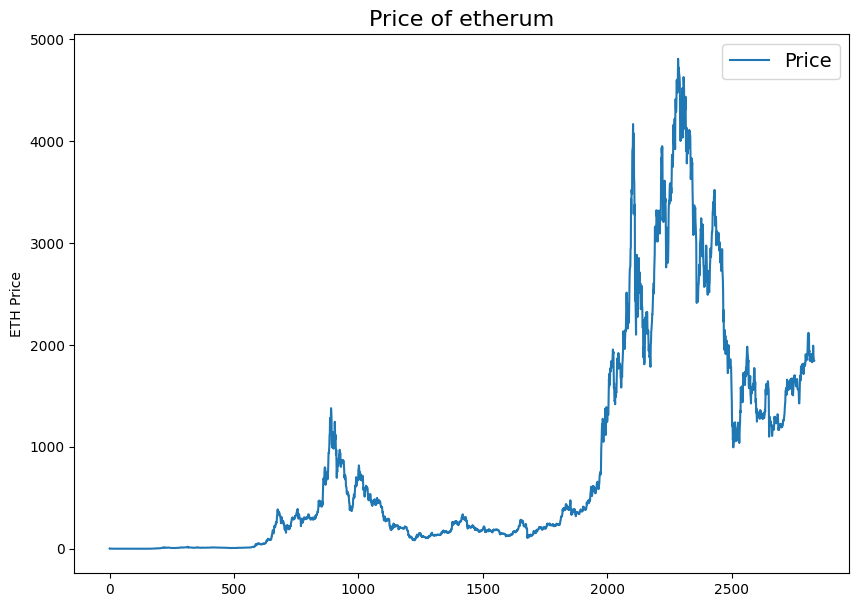

In [29]:
import matplotlib.pyplot as plt
dataset['Price'].plot(figsize=(10, 7))
plt.ylabel("ETH Price")
plt.title("Price of etherum", fontsize=16)
plt.legend(fontsize=14);

In [30]:
price_data = dataset['Price'].values
price_data

array([2.77212e+00, 7.53325e-01, 7.01897e-01, ..., 1.87099e+03,
       1.84748e+03, 1.84500e+03])

In [31]:
price_data.shape

(2833,)

In [32]:
train_data, test_data = price_data[0:2783], price_data[2783:]

In [33]:
train_data.shape, test_data.shape

((2783,), (50,))

In [34]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i : i + time_step]  # Remove the indexing with ", 0"
        dataX.append(a)
        dataY.append(series[i + time_step])
        
    return np.array(dataX), np.array(dataY)

In [35]:
X_train, y_train = windowed_dataset(train_data, time_step=7)
X_test, y_test = windowed_dataset(test_data, time_step=7)

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2775, 7), (2775,), (42, 7), (42,))

In [37]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape) 
print(X_test.shape)

(2775, 7, 1)
(42, 7, 1)


In [38]:
X_train[0]

array([[2.77212 ],
       [0.753325],
       [0.701897],
       [0.708448],
       [1.06786 ],
       [1.21744 ],
       [1.82767 ]])

In [39]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [59]:
# Create the LSTM model
model = models.Sequential()

model.add(layers.Input(shape = (7, 1), dtype=tf.float32))
# Add the Normalization layer
model.add(layers.Normalization())

# Specify the mean and variance for normalization
model.layers[0].adapt(X_train)

model.add(layers.LSTM(units=100, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.3))

model.add(layers.LSTM(units=50, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.4))

model.add(layers.LSTM(units=10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=1))

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 7, 1)             3         
 ion)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 7, 100)            40800     
                                                                 
 dropout_6 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_7 (LSTM)               (None, 7, 50)             30200     
                                                                 
 dropout_7 (Dropout)         (None, 7, 50)             0         
                                                                 
 lstm_8 (LSTM)               (None, 10)                2440      
                                                      

In [61]:
model.compile(optimizer = 'adamax', loss = 'mse', metrics = 'mae')

In [62]:
# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/30
79/79 [==============================] - 5s 16ms/step - loss: 1867268.7500 - mae: 760.4979 - val_loss: 2099715.7500 - val_mae: 1433.1194
Epoch 2/30
79/79 [==============================] - 1s 11ms/step - loss: 1805681.1250 - mae: 716.4205 - val_loss: 1968790.1250 - val_mae: 1385.4724
Epoch 3/30
79/79 [==============================] - 1s 11ms/step - loss: 1808428.1250 - mae: 821.5029 - val_loss: 1924255.1250 - val_mae: 1371.1132
Epoch 4/30
79/79 [==============================] - 1s 12ms/step - loss: 1339228.2500 - mae: 679.9426 - val_loss: 1432974.7500 - val_mae: 1181.8379
Epoch 5/30
79/79 [==============================] - 1s 12ms/step - loss: 482231.1562 - mae: 461.3914 - val_loss: 351375.7812 - val_mae: 573.8115
Epoch 6/30
79/79 [==============================] - 1s 11ms/step - loss: 679434.7500 - mae: 444.3993 - val_loss: 552372.7500 - val_mae: 728.7113
Epoch 7/30
79/79 [==============================] - 1s 12ms/step - loss: 316783.1250 - mae: 349.6941 - val_loss: 70366

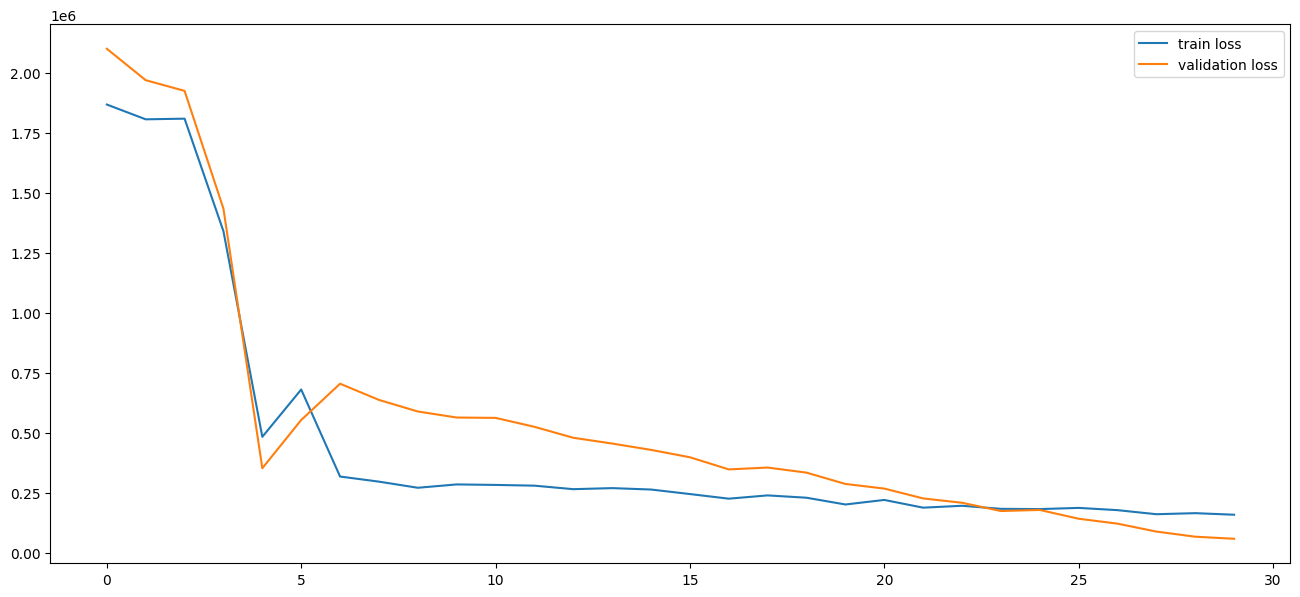

In [63]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend();

In [64]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


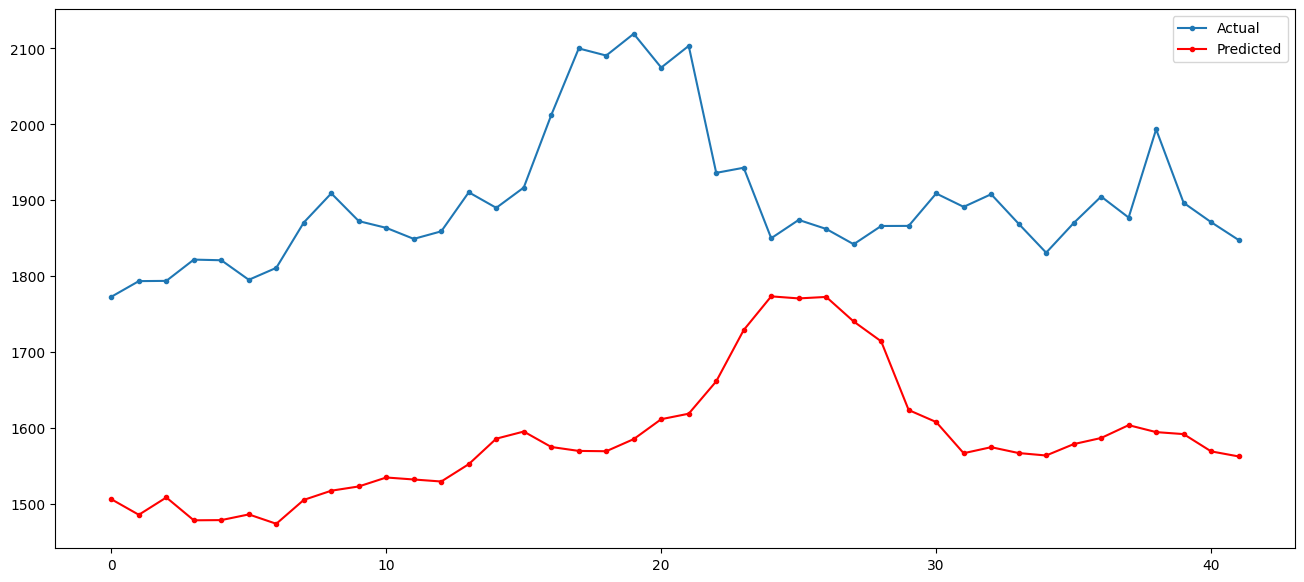

In [65]:
plt.figure(figsize=(16,7))
plt.plot(y_test.flatten(), marker='.', label="Actual")
plt.plot(test_predict.flatten(), 'r', marker='.', label="Predicted")
plt.legend();

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 220.42648875217944
Train MAE: 11.932202862986676
Test RMSE: 331.60805476105827
Test MAE: 17.722146953812615


# at Inference

In [107]:
model.save("Price_Prediction")

In [5]:
import tensorflow as tf
import numpy as np

In [49]:
model = tf.keras.saving.load_model("/content/Price_pred.h5")

In [110]:
%cp -av /content/Price_Prediction /content/drive/MyDrive/Price_Prediction_model

'/content/Price_Prediction' -> '/content/drive/MyDrive/Price_Prediction_model/Price_Prediction'
'/content/Price_Prediction/variables' -> '/content/drive/MyDrive/Price_Prediction_model/Price_Prediction/variables'
'/content/Price_Prediction/variables/variables.data-00000-of-00001' -> '/content/drive/MyDrive/Price_Prediction_model/Price_Prediction/variables/variables.data-00000-of-00001'
'/content/Price_Prediction/variables/variables.index' -> '/content/drive/MyDrive/Price_Prediction_model/Price_Prediction/variables/variables.index'
'/content/Price_Prediction/assets' -> '/content/drive/MyDrive/Price_Prediction_model/Price_Prediction/assets'
'/content/Price_Prediction/fingerprint.pb' -> '/content/drive/MyDrive/Price_Prediction_model/Price_Prediction/fingerprint.pb'
'/content/Price_Prediction/saved_model.pb' -> '/content/drive/MyDrive/Price_Prediction_model/Price_Prediction/saved_model.pb'
'/content/Price_Prediction/keras_metadata.pb' -> '/content/drive/MyDrive/Price_Prediction_model/Price_

In [111]:
X_test[0].shape

(7, 1)

In [50]:
prices = np.array([[1803.54], [1734.48], [1814.08], [1749.26], [1742.34], [1774.06], [1714.65]])

prices = prices.reshape(1, -1, 1)
prediction_price = model.predict(prices)
prediction_price = prediction_price[0][0]
print("Prediction Price: ", prediction_price)

1/1 [==============================] - 0s 295ms/step
Prediction Price:  1563.2938


In [86]:
def get_upper_lower(price):
  std_dev = np.std(prices)
  interval = 1.96 * std_dev 
  preds_mean = np.mean(prices)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [94]:
# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(price=prices)
array = [prediction_price, lower, upper]

print("Predicted Ethereum Price: {0:.2f} \nMinimum Price Range:{1:.2f} \nMaximum Price Range:{2:.2f}".format(*array))

Predicted Ethereum Price: 1563.29 
Minimum Price Range:1694.97 
Maximum Price Range:1828.57


In [95]:
tf.__version__

'2.12.0'